In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv('heartattack.csv')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,Male,atypical angina,130,132,FALSE,2,185,no,0.0,?,?,?,0
1,29,Male,atypical angina,120,243,FALSE,0,160,no,0.0,?,?,?,0
2,29,Male,atypical angina,140,?,FALSE,0,170,no,0.0,?,?,?,0
3,30,Female,typical angina,170,237,FALSE,1,170,no,0.0,?,?,fixed defect,0
4,31,Female,atypical angina,100,219,FALSE,1,150,no,0.0,?,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,Male,asymptomatic,160,331,FALSE,0,94,yes,2.5,?,?,?,1
290,54,Female,non-anginal pain,130,294,FALSE,1,100,yes,0.0,flat,?,?,1
291,56,Male,asymptomatic,155,342,TRUE,0,150,yes,3.0,flat,?,?,1
292,58,Female,atypical angina,180,393,FALSE,0,110,yes,1.0,flat,?,reversable defect,1


In [4]:
#correção da coluna e sub dos valores
df.rename(columns={'num       ': 'target'}, inplace=True)

df = df.replace('?', None)

In [5]:
#Verificação e converte dos tipos para numeros
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df.fillna(df.mean(numeric_only=True), inplace=True)

In [6]:
#Separação de dados
X = df.drop('target', axis=1)
y = df['target']

In [7]:
#Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
#Treino model RandomForest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
#Previsão
y_pred = model.predict(X_test)

In [10]:
#Resultados
print("Acuracy:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

Acuracy: 0.7627118644067796

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82        38
           1       0.68      0.62      0.65        21

    accuracy                           0.76        59
   macro avg       0.74      0.73      0.74        59
weighted avg       0.76      0.76      0.76        59



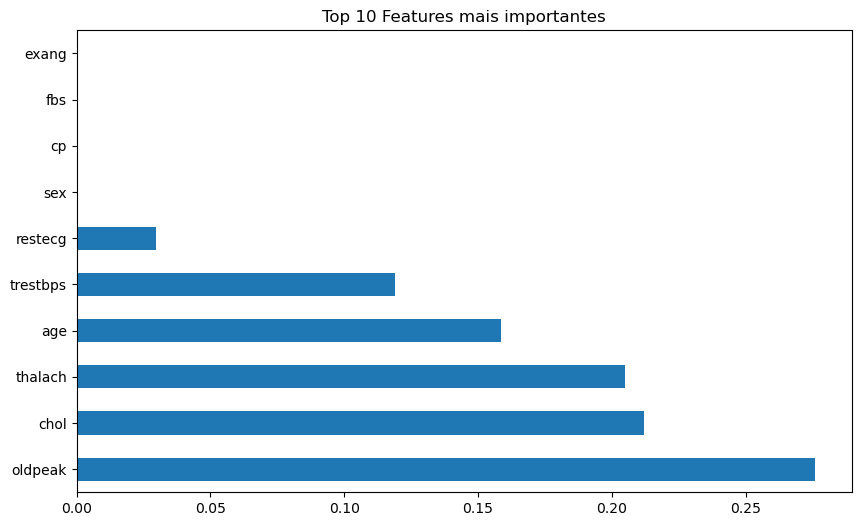

In [23]:
#Criar Grafico
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Features mais importantes")
plt.show()